# Chinook Music Store

General analysis that we need to find the albums that we chinook need to purchase to publish it in their app which can only be hypothesize by finding song genre most popular in desired country in this case which is USA.

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
db = 'chinook.db'
def run_query(q):
    with sql.connect(db) as conn:
        return pd.read_sql_query(q, conn)

# Identifing top genre of music

In [3]:
q = """
with usa_tracks As
(
SELECT t.genre_id AS genre_id, il.invoice_line_id
FROM track as t
INNER JOIN invoice_line as il ON il.track_id=t.track_id
INNER JOIN invoice as i ON i.invoice_id = il.invoice_id
WHERE i.billing_country = 'USA'
)
SELECT g.name genre_name,
COUNT(usa.genre_id) num_purchases,
ROUND((CAST(COUNT(usa.genre_id) AS FLOAT)/(SELECT COUNT(genre_id)
FROM usa_tracks))*100,2) AS percentage_sold

FROM usa_tracks AS usa
INNER JOIN genre as g ON g.genre_id = usa.genre_id

GROUP BY g.name
ORDER BY num_purchases DESC"""

df = run_query(q)
df

,genre_name,num_purchases,percentage_sold
0,Rock,561,53.38
1,Alternative & Punk,130,12.37
2,Metal,124,11.80
3,R&B/Soul,53,5.04
4,Blues,36,3.43
5,Alternative,35,3.33
6,Pop,22,2.09
7,Latin,22,2.09
8,Hip Hop/Rap,20,1.90
9,Jazz,14,1.33


now we will visulize hoe much albums are sold compaired to their genre

C:\Users\iqra com\AppData\Local\Temp\ipykernel_18852\3923951375.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df['genre_name'], fontsize = 10.5, color = 'grey')


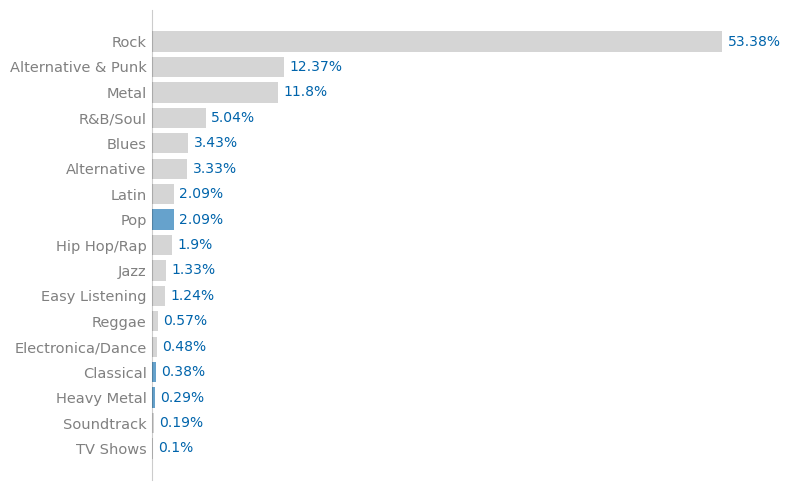

In [4]:
df = df.sort_values(by = 'percentage_sold')

album_option = ['Classical' , 'Tv shows' , 'Heavy Metal' , 'Pop']
cmap = df['genre_name'].apply(lambda x : '#0064AB' if x in album_option else '#BABABA' )

fig, ax = plt.subplots(figsize = (8,5))
bars = ax.barh(df['genre_name'], df['percentage_sold'], height = 0.8 , color= cmap, alpha = 0.6)

for bar, percentage in zip (bars , df['percentage_sold']):
    ax.text(bar.get_width()+0.5,bar.get_y() + bar.get_height()/2, f'{percentage}%' , va= 'center' , ha = 'left', fontsize = 10, color = '#0064AB' )
    
ax.set_yticklabels(df['genre_name'], fontsize = 10.5, color = 'grey')
ax.set_xticks([])
#lt.text(-0.2 , 1.07, 'Best selling Genre in the USA' ,fontsize = 20 , fontweight = 'bold' , color ='#31363b', transform=plt.gca())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_color('#000000')
ax.spines['left'].set_alpha(0.2)

ax.tick_params(axis = 'y' , which = 'both' , length = 0)
plt.tight_layout()
plt.show()


# Employee Sales performance analysis

After initial purcahse each customer assigned sales agent to measure. To measure how much sales is been average employee make we need to exract employee total slaes, hire date, number of account they handle we will also compute average sales for each account that sales executive manage. 

In [29]:
q = """
WITH t1 AS (SELECT em.first_name || ' ' || em.last_name AS sales_rep_name,
em.hire_date,
COUNT(cu.customer_id) AS num_invoices,
CAST(SUM(iv.total) AS Integer) AS total_sales
FROM employee em
JOIN customer cu
ON em.employee_id = cu.support_rep_id
JOIN invoice iv
ON iv.customer_id = cu.customer_id
GROUP BY 1
ORDER BY 4 DESC
)
SELECT*,
ROUND(CAST(total_sales AS Float) / num_invoices, 2)
AS sales_per_customer
FROM t1;
"""
df = run_query(q)
df

,sales_rep_name,hire_date,num_invoices,total_sales,sales_per_customer
0,Jane Peacock,2017-04-01 00:00:00,212,1731,8.17
1,Margaret Park,2017-05-03 00:00:00,214,1584,7.40
2,Steve Johnson,2017-10-17 00:00:00,188,1393,7.41


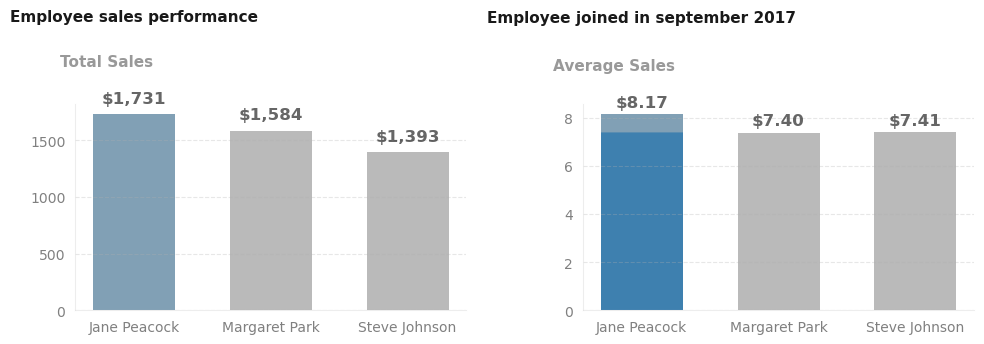

In [45]:
sales_rep_name = df['sales_rep_name'].values
total_sales = df['total_sales'].values
sales_per_customer = df['sales_per_customer'].values

fig, axes = plt.subplots(nrows = 1 , ncols = 2 , figsize = (10,8))
axes[0].bar(sales_rep_name , total_sales , color = '#BABABA' , width = 0.6)
axes[0].bar(sales_rep_name[0], total_sales[0], color = '#0064AB', alpha = 0.3, width = 0.6)
axes[0].text(x = -0.2 , y = 2150 , s = 'Total Sales' , size = 11, fontweight = 'bold', alpha = 0.4, ha = 'center')

for sales, index in zip (total_sales , range(3)):
    axes[0].text(x = index, y = sales+100, s = '${:,}'.format(sales), ha = 'center',
                fontweight = 'bold' , alpha = 0.6 , size = 12)
axes[0].text(x = 0 , y= 2550 , s = 'Employee sales performance',
             size = 11, fontweight='bold', alpha = 0.9, ha = 'center')
#Average sales
axes[1].bar(sales_rep_name, sales_per_customer, color = '#BABABA' , width = 0.6)
axes[1].bar(sales_rep_name[0], sales_per_customer, color = '#0064AB' , alpha=0.3 ,width = 0.6)
axes[1].text(x=-0.2, y=10, s= "Average Sales" , size = 11, fontweight = 'bold', alpha = 0.4, ha= 'center')
for sales, index in zip (sales_per_customer , range(3)):
    axes[1].text(x = index, y = sales+0.3, s = '${:,.2f}'.format(sales), ha = 'center',
                fontweight = 'bold' , alpha = 0.6 , size = 12)
#axes[1].text(x = 0 , y= 11.7 , s = 'employeed joined in september 2017',
#            size = 11, alpha = 0.9)
axes[1].text(x = 0 , y= 12 , s = 'Employee joined in september 2017',
             size = 11, fontweight='bold', alpha = 0.9, ha = 'center')

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#DDD')
    ax.spines['left'].set_alpha(0.5)
    ax.spines['bottom'].set_color('#DDD')
    ax.spines['bottom'].set_alpha(0.5)
    
    ax.tick_params(left = False, bottom = False, labelsize=10, labelcolor = 'grey')
    ax.grid(axis = 'y', linestyle='--', alpha = 0.3)
    
plt.tight_layout(rect = [0, 0.3, 1, 0.95])
plt.show()

# Sales by Country
chinook wnats to understand how sales are distributed accros different countries to run advertising campaigns in these countires. To solve this we will beign with query that show data on purchases fro different countries. For eaach countries we will include total customer, total sales, average sales per customer and average order value. Where countries has onlu one cusotmer we will include them in "OTHER" group.

In [7]:
q ="""
-- Collate the number of customer in each country
WITH t1 AS(SELECT country, COUNT(customer_id) AS num_customers
FROM customer
GROUP BY country
),
--Collate the total sales in each country
t2 AS(SELECT cu.country,
ROUND(SUM(iv.total),2) AS total_sales,
COUNT(iv.invoice_id)AS num_sales
FROM customer cu
JOIN invoice iv
ON cu.customer_id = iv.customer_id
GROUP BY 1
),
-- Group countries with only one csutomer as 'Others'
t3 AS (SELECT CASE WHEN t1.num_customers = 1 THEN 'Others'
ELSE t1.country END AS countries,
SUM(t1.num_customers)AS num_customers,
SUM(t2.total_sales)AS total_sales,
SUM(t2.num_sales)AS num_sales
FROM t1
JOIN t2
ON t1.country= t2.country
GROUP BY 1
)
-- Calculate relevant sales metrics
SELECT countries,
num_customers,
total_sales,
ROUND(total_sales/num_sales, 2) AS avg_order_value,
ROUND(total_sales/num_customers, 2) AS sales_per_customer
FROM (
SELECT *,
CASE WHEN countries = 'Others' THEN 1
ELSE 0 END AS sort
FROM t3
)
ORDER by sort, num_customers DESC;
"""
df = run_query(q)
df

,countries,num_customers,total_sales,avg_order_value,sales_per_customer
0,USA,13,1040.49,7.94,80.04
1,Canada,8,535.59,7.05,66.95
2,Brazil,5,427.68,7.01,85.54
3,France,5,389.07,7.78,77.81
4,Germany,4,334.62,8.16,83.66
5,United Kingdom,3,245.52,8.77,81.84
6,Czech Republic,2,273.24,9.11,136.62
7,India,2,183.15,8.72,91.58
8,Portugal,2,185.13,6.38,92.57
9,Others,15,1094.94,7.45,73.00


In [8]:
avg_cust_purchase =df.sales_per_customer.mean()
print(avg_cust_purchase)
df['pcent_customer'] = round(100*df.num_customers / df.num_customers.sum(),1)
df['pcent_sales']= round(100*df.total_sales/df.total_sales.sum(),1)
df['cust_purchase_diff'] = round(100*(df.sales_per_customer - avg_cust_purchase)/
                                avg_cust_purchase, 2)

86.96099999999998


In [9]:
df

,countries,num_customers,total_sales,avg_order_value,sales_per_customer,pcent_customer,pcent_sales,cust_purchase_diff
0,USA,13,1040.49,7.94,80.04,22.0,22.1,-7.96
1,Canada,8,535.59,7.05,66.95,13.6,11.4,-23.01
2,Brazil,5,427.68,7.01,85.54,8.5,9.1,-1.63
3,France,5,389.07,7.78,77.81,8.5,8.3,-10.52
4,Germany,4,334.62,8.16,83.66,6.8,7.1,-3.80
5,United Kingdom,3,245.52,8.77,81.84,5.1,5.2,-5.89
6,Czech Republic,2,273.24,9.11,136.62,3.4,5.8,57.10
7,India,2,183.15,8.72,91.58,3.4,3.9,5.31
8,Portugal,2,185.13,6.38,92.57,3.4,3.9,6.45
9,Others,15,1094.94,7.45,73.00,25.4,23.2,-16.05


# Now we visualize

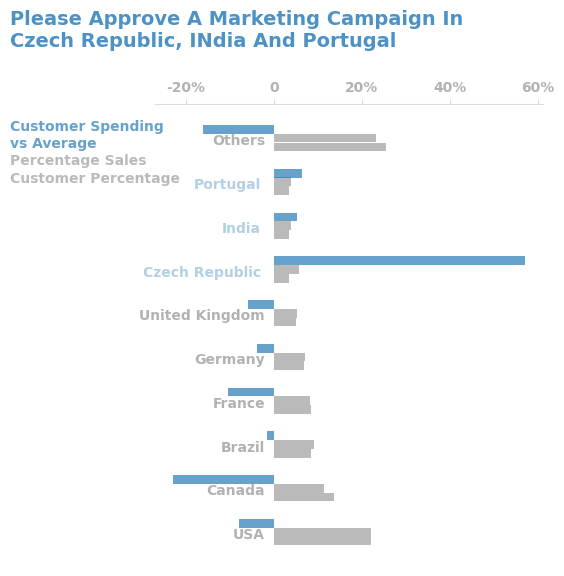

In [10]:
y_labs = df.countries.values
y_axes = np.arange(df.countries.size)

fig = plt.figure(figsize = (5,6))
plt.barh(y_axes-0.3, df.pcent_customer, height = 0.2, color = '#BABABA')
plt.barh(y_axes-0.1, df.pcent_sales, height=0.2, color = '#BABABA')
plt.barh(y_axes+0.1, df.cust_purchase_diff, height=0.2, color='#0064AB', alpha = 0.6)

color_map = ['', '','','','','', 'Yes', 'Yes', 'Yes','']

for loc, label, color in zip(y_axes, y_labs, color_map):
    if color == 'Yes':
        plt.text(x=-3, y=loc-0.25, s=label, ha='right', color = '#0064AB',
                 size=10, alpha=0.3, fontweight = 'bold')
    else:
        plt.text(x=-2, y=loc-0.25,s=label,ha='right',size = 10, alpha=0.3,fontweight = 'bold')
            
plt.text(x=-60, y=8.7, s='Customer Spending\nvs Average', color = '#0064AB',
        size = 10 , alpha = 0.6, fontweight = 'bold')
plt.text(x=-60, y=8.3, s='Percentage Sales', color = '#BABABA',
        size = 10 , fontweight = 'bold')
plt.text(x=-60, y=7.9, s='Customer Percentage', color = '#BABABA',
        size = 10 , fontweight = 'bold')

plt.text(x=-60, y=11, s='Please Approve A Marketing Campaign In\nCzech Republic, INdia And Portugal', color = '#0064AB',
        size = 14 , alpha = 0.7, fontweight = 'bold')

for ax in fig.get_axes():
    plt.sca(ax)
    sns.despine(left=True, bottom = True, top=False)
    ax.tick_params(left=False, bottom=False, color='#ddd')
    ax.xaxis.set_ticks_position('top')
    ax.spines['top'].set_color('#DDD')
    plt.yticks([])
    plt.xticks([-20,0,20,40,60],['-20%','0','20%','40%','60%'],
              size = 10, alpha = 0.3, fontweight='bold')

# Result
---The majority os slaes is in United state and Canada but the fund spend by each customer is low compaired to 

---CZech Republic, India and portgual have less sales with less average spending except for Czech Republic although the three of of them have average spending higher than any other countries.

---If chinook want to focus their adverising budget on one countries it will be preferred to spend it on "CZECH REPUBLIC" becuase the amount willingly spend by customer is greater if chinook were to advertise their app customer will buy the product more so there will be more sales with and chinook can charged their product to customer at premium price.

# How many track never sell
To answer this question we have to compaired invoices and entire inventory with each other in another word we can say we have to see how many tracks have been purchased from enitre inventory table.

In [11]:
q = """ WITH all_and_purchased AS
(
SELECT t.track_id all_tracks, il.track_id AS purchased_tracks
FROM track AS t
LEFT JOIN invoice_line il ON il.track_id = t.track_id
)
SELECT COUNT(DISTINCT a.all_tracks) total_tracks,
COUNT(DISTINCT a.purchased_tracks) tracks_purchased,
COUNT(DISTINCT a.all_tracks) - COUNT(DISTINCT a.purchased_tracks) not_purchased,
ROUND(COUNT(DISTINCT a.purchased_tracks)/CAST(COUNT(DISTINCT a.all_tracks)AS float), 2)percent_purchased
FROM all_and_purchased AS a;"""
purchased = run_query(q)
purchased

,total_tracks,tracks_purchased,not_purchased,percent_purchased
0,3503,1806,1697,0.52


In [12]:
not_purchased =purchased['total_tracks']-purchased['tracks_purchased']

In [13]:
purchased = purchased.T
purchased = purchased.iloc[[1,2],0]
purchased_list = purchased.tolist()

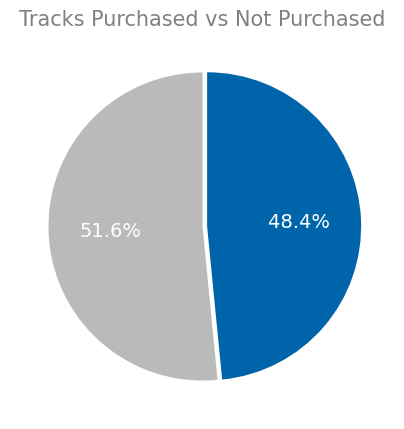

In [14]:
plt.pie(purchased_list,
       explode = (0,0.03),
       startangle=90,
       autopct = '%1.1f%%',
       textprops = {'fontsize': 14, 'color':'white'},
       colors = ('#BABABA', '#0064AB'))

plt.title('Tracks Purchased vs Not Purchased' , fontsize = 15, color = 'gray')
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

# Observation
suprinslgly almost half of the track inventory has not sold let see from bottom performer what can be learn more

In [15]:
q = """
SELECT ar.name artist_name,
g.name genre,
COUNT(il.track_id) units_sold
FROM track t
LEFT JOIN invoice_line il ON il.track_id = t.track_id
INNER JOIN album al ON al.album_id = t.album_id
INNER JOIN artist ar ON ar.artist_id = al.artist_id
INNER JOIN genre as g ON g.genre_id = t.genre_id
GROUP BY artist_name
HAVING units_sold = 0
ORDER BY units_sold;
"""
run_query(q)

,artist_name,genre,units_sold
0,Aaron Copland & London Symphony Orchestra,Classical,0
1,Academy of St. Martin in the Fields Chamber En...,Classical,0
2,"Academy of St. Martin in the Fields, John Birc...",Classical,0
3,"Academy of St. Martin in the Fields, Sir Nevil...",Classical,0
4,Adrian Leaper & Doreen de Feis,Classical,0
...,...,...,...
69,The Office,TV Shows,0
70,The Tea Party,Alternative & Punk,0
71,Ton Koopman,Classical,0
72,Toquinho & Vinícius,Bossa Nova,0


# Observation
74 artist have not sold any units most of them included classical music genre.
depedning on the payment:
chinook should ficus more on high performing artist with popular genre and discontnue less succesful artist
secondly chinook pays the record label based on sales percentage there is little downside to keeping the tracks in the store.

# Album and indivdiual tracks

In [16]:
q = """
WITH invoice_data AS
(
SELECT invoice_id, MIN(track_id) track_id
FROM invoice_line
GROUP BY 1
),
ALBUM_PURCHASED AS
(
SELECT invoice_id,
Case
When
(
SELECT t2.track_id
FROM track t1
JOIN track t2
ON
t1.album_id = t2.album_id
Where t1.track_id = invd.track_id
Except

SELECT il.track_id
FROM invoice_line il
WHERE il.invoice_id = invd.invoice_id
) IS NULL


Then "Yes"
ELSE "No"
END AS Purchased_Album
FROM invoice_data invd
)
SELECT Purchased_Album,
COUNT(invoice_id) AS no_of_invoices,
CAST(COUNT(invoice_id)AS Float)*100/
(SELECT COUNT(*) FROM Album_purchased) AS percent
FROM Album_purchased
GROUP BY 1
"""
run_query(q)

,Purchased_Album,no_of_invoices,percent
0,No,497,80.944625
1,Yes,117,19.055375


## Result
most purchases 80.9% from the store thata are individual tracks. However in about 19% of cases customer buy albums. CHinook should be careful with purchasing only the most popular tracks since it risk losing revenue from customer who purchases entire albums.

# Conslusion
In conclusion, our comprehensive analysis of Chinook Music Store's data has provided valuable insights into various facets of the business operations. Through the examination of top music genres, we have identified trends that inform strategic decisions regarding inventory management and customer preferences. Additionally, our evaluation of employee sales performance has shed light on areas of excellence and opportunities for improvement, facilitating targeted training initiatives and performance optimization strategies.

Moreover, the analysis by country of music consumption has unveiled nuanced patterns, enabling the refinement of marketing efforts tailored to specific geographical regions. Furthermore, the examination of individual artist or album sales has provided actionable intelligence for optimizing product offerings and promotional activities.

Importantly, our investigation into unsold albums has yielded crucial insights into underlying factors contributing to inventory stagnation. By understanding the reasons behind unsold inventory, Chinook Music Store can implement proactive measures to mitigate future losses and enhance overall profitability.

In essence, the findings from our data analysis serve as a cornerstone for informed decision-making, enabling Chinook Music Store to adapt and thrive in an ever-evolving music industry landscape. Moving forward, leveraging these insights will be instrumental in driving sustainable growth and maintaining competitive advantage in the market.